In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
from citipy import citipy

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=868a06ec0039e1cac9e21402b360fc66


In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | hovd
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | norsup
Processing Record 5 of Set 1 | cockburn town
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | brainerd
Processing Record 9 of Set 1 | lagoa
Processing Record 10 of Set 1 | boa vista
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | tuni
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | inhambane
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | verkhoyansk
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | kamenka
Processing Rec

Processing Record 37 of Set 4 | nanakuli
Processing Record 38 of Set 4 | bowen
Processing Record 39 of Set 4 | emba
Processing Record 40 of Set 4 | husavik
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | lakshmipur
Processing Record 43 of Set 4 | san andres
Processing Record 44 of Set 4 | samarai
Processing Record 45 of Set 4 | shizunai
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 48 of Set 4 | sechura
Processing Record 49 of Set 4 | poum
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | monrovia
Processing Record 2 of Set 5 | qianan
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | dali
Processing Record 7 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 5 | fort nelson
Processing Record 9 of Se

Processing Record 25 of Set 8 | yerbogachen
Processing Record 26 of Set 8 | villa bruzual
Processing Record 27 of Set 8 | burgeo
Processing Record 28 of Set 8 | huaidian
Processing Record 29 of Set 8 | houma
Processing Record 30 of Set 8 | dondo
Processing Record 31 of Set 8 | san cristobal
Processing Record 32 of Set 8 | sheopur
Processing Record 33 of Set 8 | port blair
Processing Record 34 of Set 8 | maragogi
Processing Record 35 of Set 8 | puerto madryn
Processing Record 36 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 37 of Set 8 | san juan
Processing Record 38 of Set 8 | yar-sale
Processing Record 39 of Set 8 | bargal
City not found. Skipping...
Processing Record 40 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 41 of Set 8 | baruun-urt
Processing Record 42 of Set 8 | isangel
Processing Record 43 of Set 8 | buala
Processing Record 44 of Set 8 | warqla
City not found. Skipping...
Processing Record 45 of Set 8 | goderich
Processing R

Processing Record 8 of Set 12 | kupang
Processing Record 9 of Set 12 | krasnoborsk
Processing Record 10 of Set 12 | bud
Processing Record 11 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 12 of Set 12 | kudahuvadhoo
Processing Record 13 of Set 12 | moerai
Processing Record 14 of Set 12 | khandyga
Processing Record 15 of Set 12 | bouar
Processing Record 16 of Set 12 | linchuan
City not found. Skipping...
Processing Record 17 of Set 12 | biak
Processing Record 18 of Set 12 | labuhan
Processing Record 19 of Set 12 | lanzhou
Processing Record 20 of Set 12 | korla
Processing Record 21 of Set 12 | muhammadabad
Processing Record 22 of Set 12 | sumbawanga
Processing Record 23 of Set 12 | stromness
Processing Record 24 of Set 12 | plettenberg bay
Processing Record 25 of Set 12 | villa rica
Processing Record 26 of Set 12 | nola
Processing Record 27 of Set 12 | aljezur
Processing Record 28 of Set 12 | cam pha
City not found. Skipping...
Processing Record 29 of Set 12 | college

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,94.42,35,0,7.00,US,2022-08-10 21:27:07
1,Hovd,48.0056,91.6419,68.83,34,100,4.97,MN,2022-08-10 21:25:50
2,Norsup,-16.0667,167.3833,75.16,77,95,15.68,VU,2022-08-10 21:27:08
3,Cockburn Town,21.4612,-71.1419,81.54,78,5,18.34,TC,2022-08-10 21:27:08
4,Atuona,-9.8000,-139.0333,77.32,76,13,22.08,PF,2022-08-10 21:27:08
5,Necochea,-38.5473,-58.7368,51.49,66,100,12.75,AR,2022-08-10 21:27:09
6,Brainerd,46.3580,-94.2008,80.85,36,0,6.91,US,2022-08-10 21:27:09
7,Lagoa,39.0500,-27.9833,71.01,71,77,8.12,PT,2022-08-10 21:27:09
8,Boa Vista,2.8197,-60.6733,91.38,49,40,10.36,BR,2022-08-10 21:27:10
9,Rikitea,-23.1203,-134.9692,73.44,74,89,22.41,PF,2022-08-10 21:23:12


In [10]:
#rearrange columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]

In [11]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2022-08-10 21:27:07,37.1041,-113.5841,94.42,35,0,7.00
1,Hovd,MN,2022-08-10 21:25:50,48.0056,91.6419,68.83,34,100,4.97
2,Norsup,VU,2022-08-10 21:27:08,-16.0667,167.3833,75.16,77,95,15.68
3,Cockburn Town,TC,2022-08-10 21:27:08,21.4612,-71.1419,81.54,78,5,18.34
4,Atuona,PF,2022-08-10 21:27:08,-9.8000,-139.0333,77.32,76,13,22.08
...,...,...,...,...,...,...,...,...,...
528,Araouane,ML,2022-08-10 21:41:29,18.9048,-3.5265,98.13,26,5,8.93
529,Kulhudhuffushi,MV,2022-08-10 21:41:31,6.6221,73.0700,81.09,85,11,15.17
530,Shimanovsk,RU,2022-08-10 21:41:32,52.0000,127.7000,53.64,93,99,3.29
531,Bumba,CD,2022-08-10 21:41:32,2.1833,22.4667,73.90,80,89,3.15


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 73.67,
  'feels_like': 74.12,
  'temp_min': 68.95,
  'temp_max': 80.17,
  'pressure': 1016,
  'humidity': 72},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 80},
 'clouds': {'all': 20},
 'dt': 1660167613,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1660124769,
  'sunset': 1660175590},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Get the JSON data.
boston_data = city_weather.json()

In [15]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1660124769,
 'sunset': 1660175590}

In [17]:
boston_data["sys"]["country"]

'US'

In [18]:
boston_data["dt"]

1660167613

In [19]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 80.17 72 20 11.5


In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-08-10 21:40:13'

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


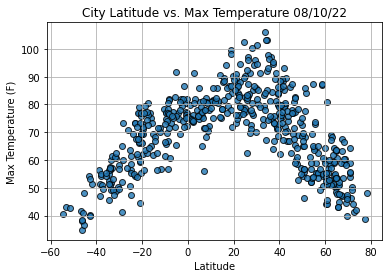

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

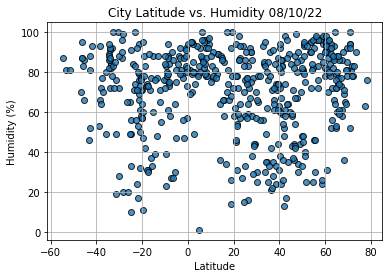

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

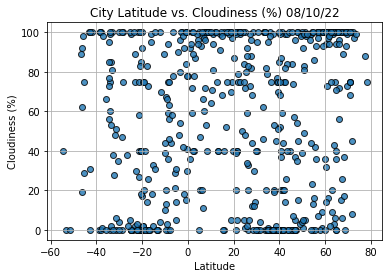

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

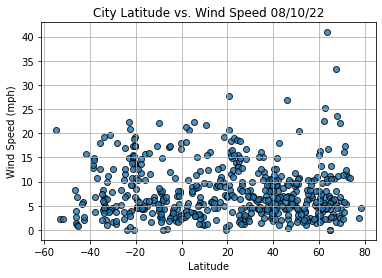

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

In [28]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]

In [30]:
index13

City                    Inhambane
Country                        MZ
Date          2022-08-10 21:27:11
Lat                       -23.865
Lng                       35.3833
Max Temp                    69.42
Humidity                       84
Cloudiness                      0
Wind Speed                   7.31
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
528     True
529     True
530     True
531     True
532     True
Name: Lat, Length: 533, dtype: bool

In [32]:
#obtaining cities in Northern Hemisphere by using loc method
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2022-08-10 21:27:07,37.1041,-113.5841,94.42,35,0,7.00
1,Hovd,MN,2022-08-10 21:25:50,48.0056,91.6419,68.83,34,100,4.97
3,Cockburn Town,TC,2022-08-10 21:27:08,21.4612,-71.1419,81.54,78,5,18.34
6,Brainerd,US,2022-08-10 21:27:09,46.3580,-94.2008,80.85,36,0,6.91
7,Lagoa,PT,2022-08-10 21:27:09,39.0500,-27.9833,71.01,71,77,8.12


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

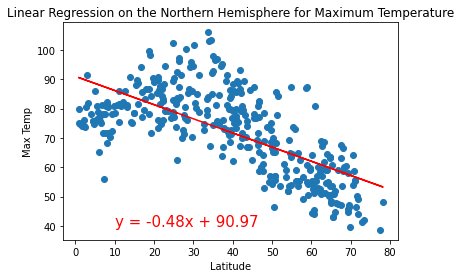

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

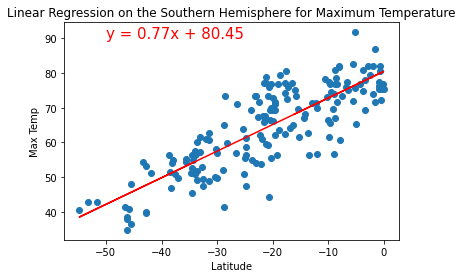

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

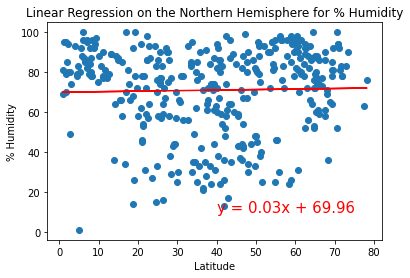

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

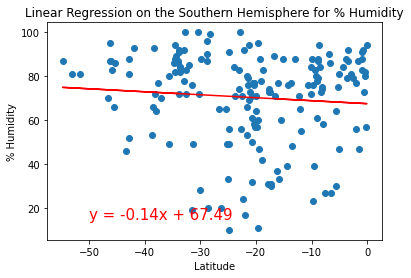

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

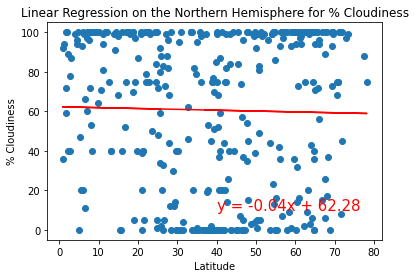

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

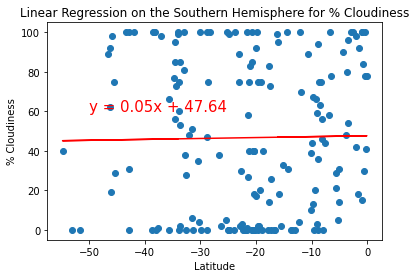

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

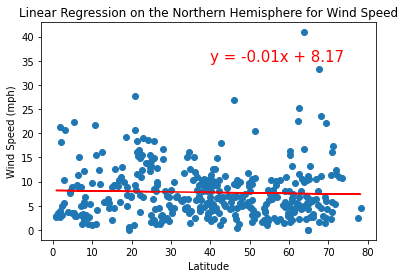

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)',(40,35))

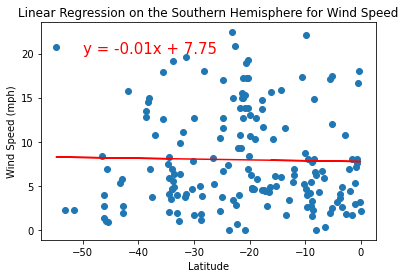

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)',(-50,20))